# Installation

- Run these commands

    - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

    - cd Monk_Object_Detection/7_yolov3/installation

-Select the right requirements file and run
    - cat requirements.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
#! cd Monk_Object_Detection/7_yolov3/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the right CUDA version
! cd Monk_Object_Detection/7_yolov3/installation && cat requirements.txt | xargs -n 1 -L 1 pip install

# DATA Conversion-Monk to YOLO Format

In [1]:
import os
import sys

In [2]:
root_dir = "Document_Layout_Analysis/";
img_dir = "Images/";
anno_file = "train_labels.csv";

In [3]:
labels_dir = "labels";
classes_file = "classes.txt";

In [4]:
labels_dir_relative = root_dir + "/" + labels_dir
if(not os.path.isdir(labels_dir_relative)):
    os.mkdir(labels_dir_relative);

In [5]:
import pandas as pd
df = pd.read_csv(root_dir + anno_file);
len(df)

1783

In [6]:
columns = df.columns
classes = [];
for i in range(len(df)):
    img_file = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(" ");
    for j in range(len(tmp)//5):
        label = tmp[j*5 + 4];
        if(label not in classes):
            classes.append(label);
classes = sorted(classes)
classes

['caption',
 'chart',
 'credit',
 'drop-capital',
 'floating',
 'footer',
 'frame',
 'graphics',
 'header',
 'heading',
 'image',
 'linedrawing',
 'maths',
 'noise',
 'page-number',
 'paragraph',
 'separator',
 'table']

In [7]:
f = open(root_dir + "/" + classes_file, 'w');
for i in range(len(classes)):
    f.write(classes[i]);
    f.write("\n");
f.close();

In [8]:
from PIL import Image
from tqdm.notebook import tqdm

In [9]:
for i in tqdm(range(len(df))):
    img_file = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(" ");
    fname = labels_dir_relative + "/" + img_file.split(".")[0] + ".txt";
    img = Image.open(root_dir + "/" + img_dir + "/" + img_file);
    width, height = img.size
    
    f = open(fname, 'w');
    for j in range(len(tmp)//5):
        x1 = float(tmp[j*5 + 0]);
        y1 = float(tmp[j*5 + 1]);
        x2 = float(tmp[j*5 + 2]);
        y2 = float(tmp[j*5 + 3]);
        label = tmp[j*5 + 4];
        
        x_c = str(((x1 + x2)/2)/width);
        y_c = str(((y1 + y2)/2)/height);
        w = str((x2 - x1)/width);
        h = str((y2 - y1)/height);
        index = str(classes.index(label));
        
        f.write(index + " " + x_c + " " + y_c + " " + w + " " + h);
        f.write("\n");
    f.close();

# Training

In [16]:
import os
import sys
sys.path.append("Monk_Object_Detection/7_yolov3/lib")

In [17]:
from train_detector import Detector

In [18]:
gtf = Detector();

In [19]:
#dataset directories
img_dir = "Document_Layout_Analysis/Images/"
label_dir = "Document_Layout_Analysis/labels/"
class_list_file = "Document_Layout_Analysis/classes.txt"

gtf.set_train_dataset(img_dir, label_dir, class_list_file, batch_size=8)
gtf.set_val_dataset(img_dir, label_dir)

In [20]:
#Setting model as yolov3
gtf.set_model(model_name="yolov3");

In [21]:
#sgd is found out to perform better than adam optimiser on this task
gtf.set_hyperparams(optimizer="sgd", lr=0.005, multi_scale=False, evolve=False);

Using CUDA Apex device0 _CudaDeviceProperties(name='GeForce GTX 1050 Ti', total_memory=4040MB)



Caching labels (1783 found, 0 missing, 0 empty, 1 duplicate, for 1783 images): 100%|██████████| 1783/1783 [00:00<00:00, 5763.98it/s]
Caching labels (1783 found, 0 missing, 0 empty, 1 duplicate, for 1783 images): 100%|██████████| 1783/1783 [00:00<00:00, 6152.69it/s]


Model Summary: 222 layers, 6.16153e+07 parameters, 6.16153e+07 gradients
Using 8 dataloader workers
Starting training for 10 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 112/112 [02:30<00:00,  1.35s/it]


                 all  1.78e+03  3.67e+04   0.00452    0.0266    0.0052   0.00772


/home/swapnil/anaconda3/envs/monk/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:114: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)



     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/112 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 112/112 [02:20<00:00,  1.26s/it]


                 all  1.78e+03  3.67e+04    0.0635    0.0655    0.0265    0.0397

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/112 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 112/112 [02:24<00:00,  1.29s/it]


                 all  1.78e+03  3.67e+04    0.0936     0.109    0.0444    0.0781

Model Bias Summary:    layer        regression        objectness    classification
                          82      -0.06+/-0.07      -5.04+/-0.35      -4.92+/-0.28 
                          94       0.04+/-0.29      -4.97+/-0.18      -4.84+/-0.55 
                         106       0.11+/-0.21      -6.19+/-0.20      -4.74+/-0.45 

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/112 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 112/112 [02:28<00:00,  1.33s/it]


                 all  1.78e+03  3.67e+04     0.178     0.144    0.0988      0.14

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/112 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 112/112 [02:38<00:00,  1.42s/it]


                 all  1.78e+03  3.67e+04     0.276     0.214     0.151      0.19

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/112 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 112/112 [02:27<00:00,  1.32s/it]


                 all  1.78e+03  3.67e+04     0.286     0.232     0.167     0.212

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/112 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 112/112 [02:17<00:00,  1.23s/it]


                 all  1.78e+03  3.67e+04     0.124     0.101    0.0665    0.0868

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/112 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 112/112 [02:18<00:00,  1.23s/it]


                 all  1.78e+03  3.67e+04      0.37     0.325     0.257     0.296

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 112/112 [02:17<00:00,  1.23s/it]


                 all  1.78e+03  3.67e+04     0.375     0.317     0.256      0.29

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 112/112 [02:22<00:00,  1.27s/it]


                 all  1.78e+03  3.67e+04     0.424     0.383     0.318     0.348
10 epochs completed in 1.632 hours.



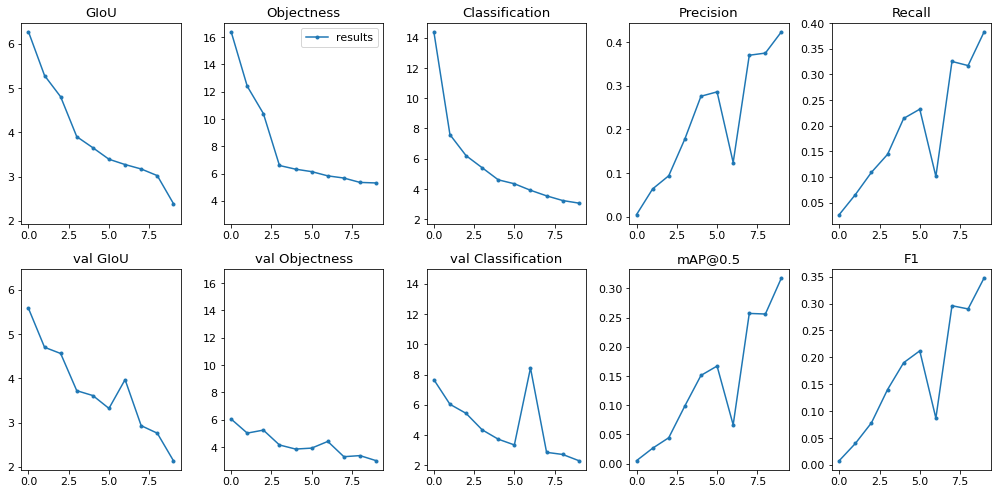

In [22]:
gtf.Train(num_epochs=10);

The training curves (in the notebook) haven't flattened out yet which suggests that the model can be trained more.

# Inference

In [23]:
import os
import sys
from IPython.display import Image
sys.path.append("Monk_Object_Detection/7_yolov3/lib");

In [24]:
from infer_detector import Infer

In [25]:
gtf = Infer();

In [26]:
f = open("Document_Layout_Analysis/classes.txt");
class_list = f.readlines();
f.close();

In [27]:
model_name = "yolov3";
weights = "weights/last.pt";
gtf.Model(model_name, class_list, weights, use_gpu=True, input_size=416);

Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 1050 Ti', total_memory=4040MB)



image 1/1 tmp/test1.jpg: 416x320 1 heading
s, 6 paragraph
s, Done. (1.166s)
Results saved to /home/swapnil/output
Done. (1.679s)


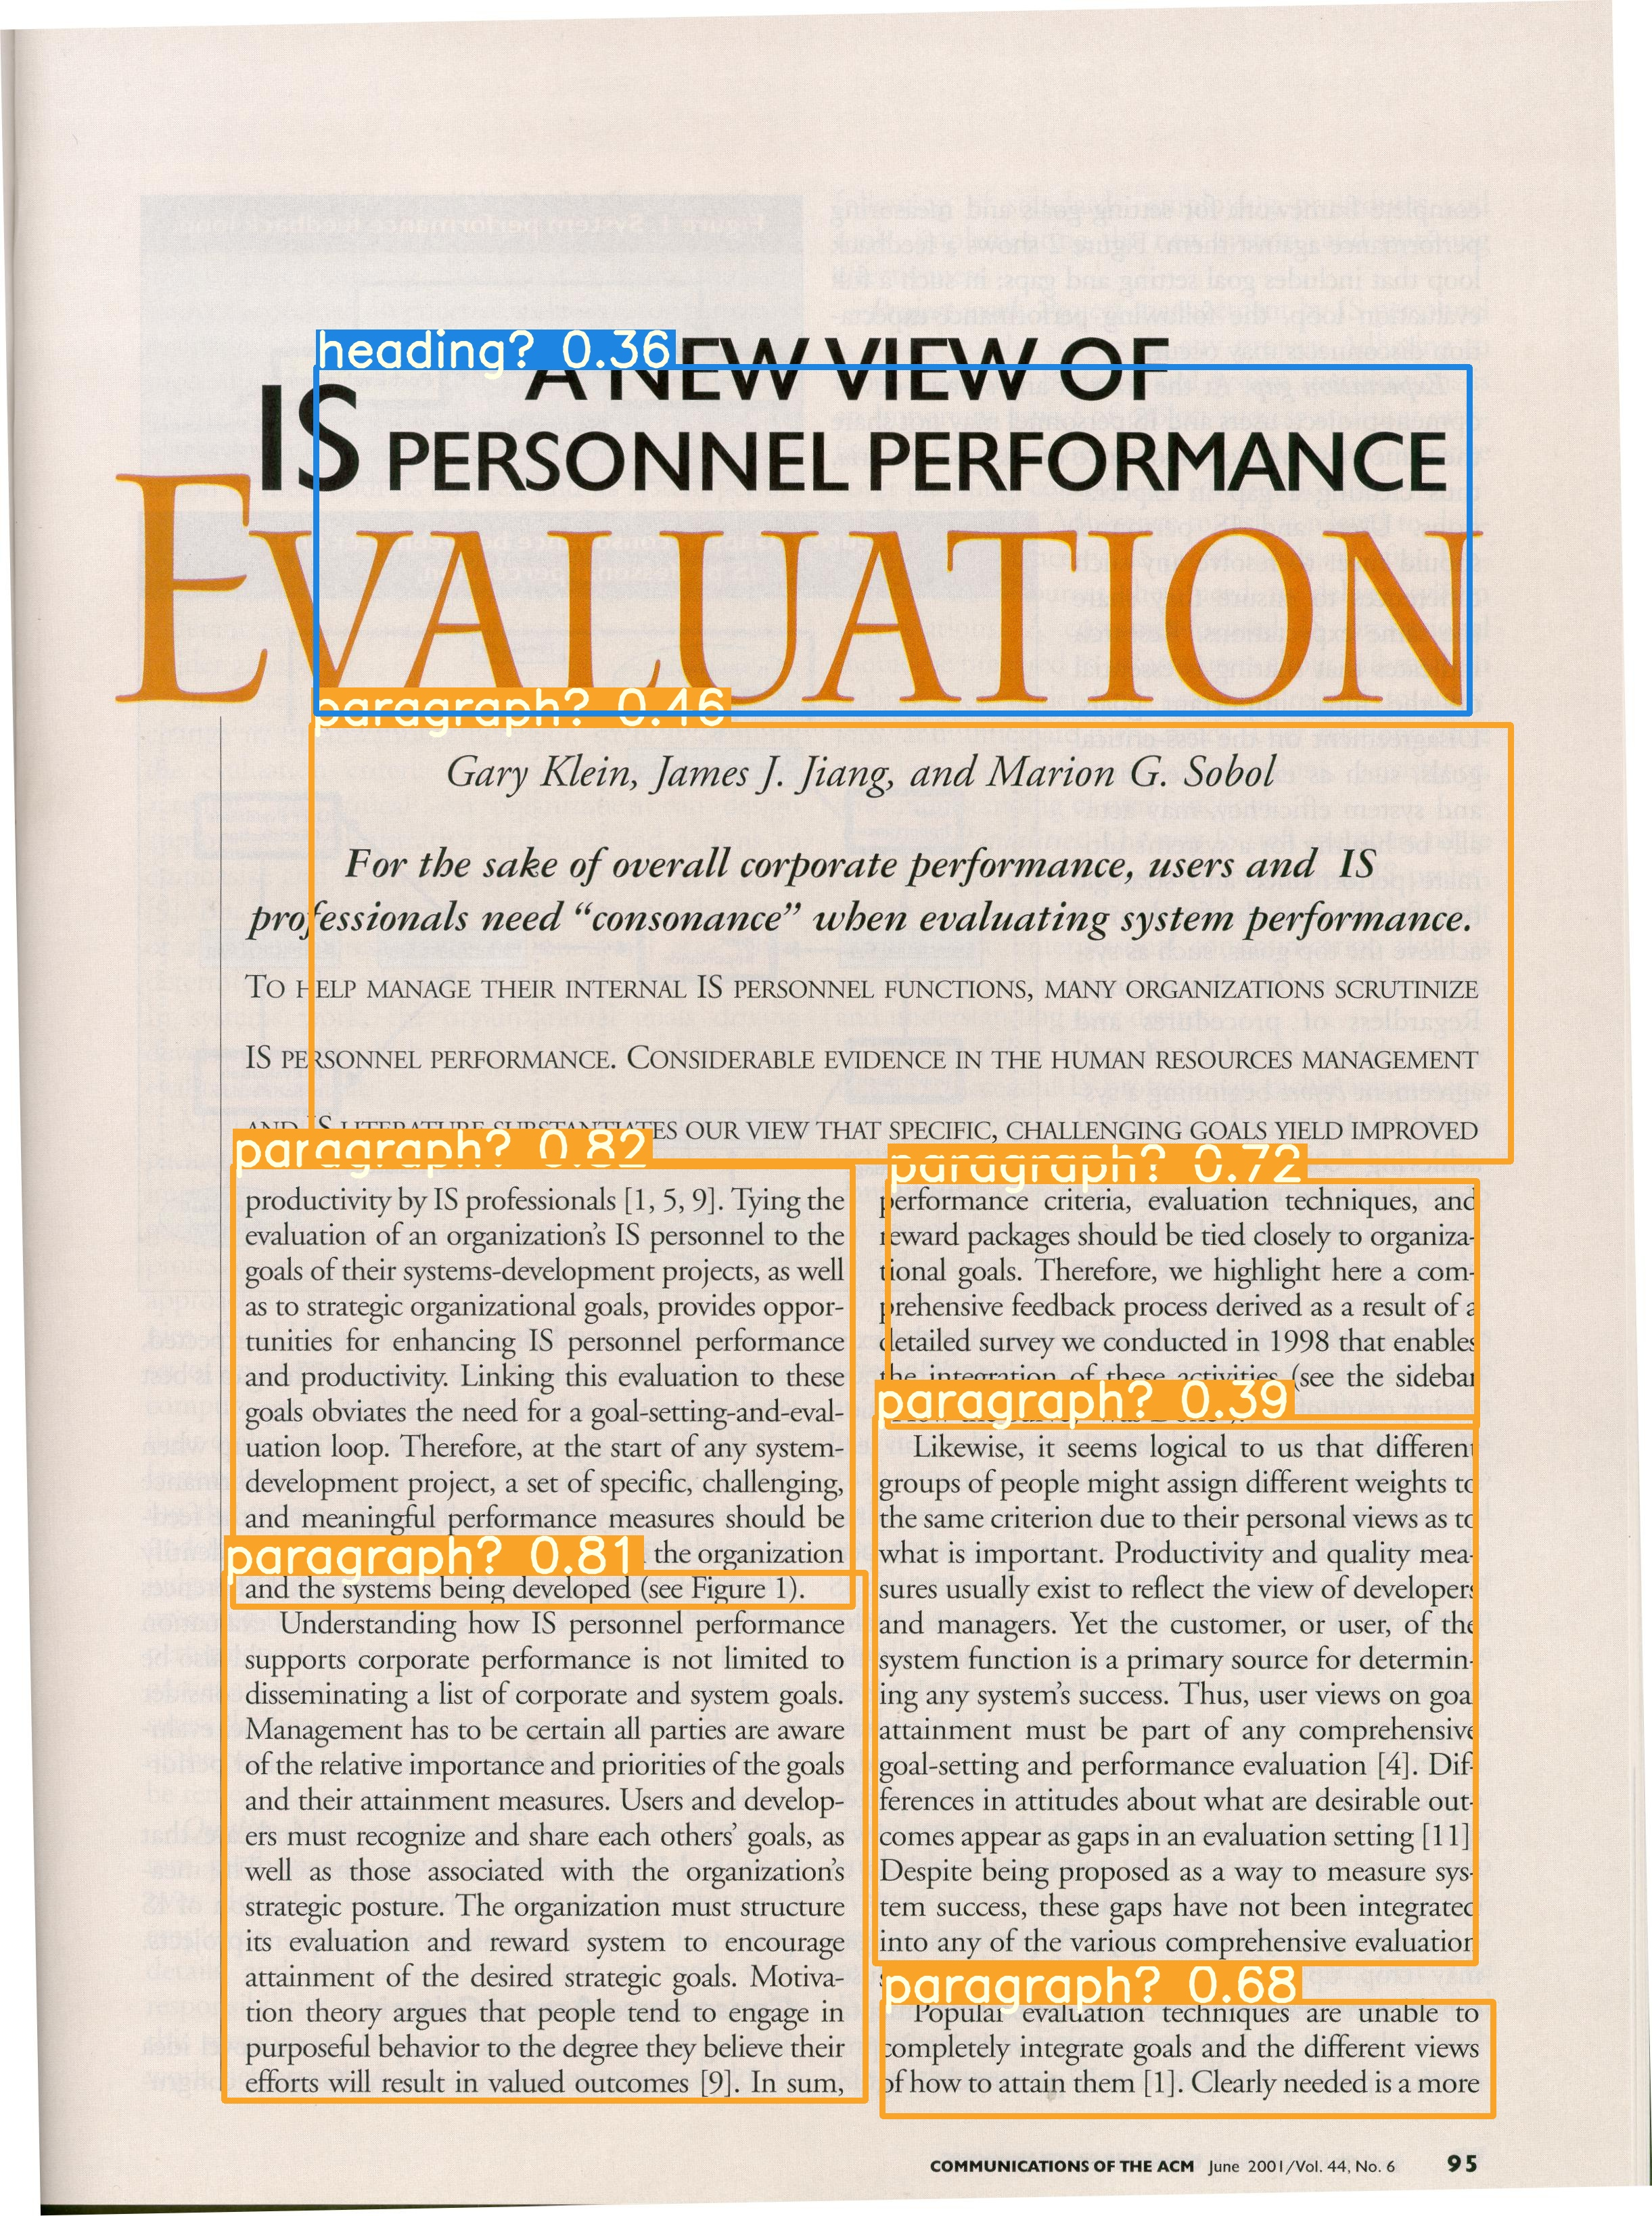

In [28]:
img_path = "PRImA_Layout_Analysis_Dataset/Test_Images/test1.jpg";
gtf.Predict(img_path, conf_thres=0.3, iou_thres=0.5);
Image(filename='output/test1.jpg')

image 1/1 tmp/test2.jpg: 416x320 2 image
s, 8 paragraph
s, Done. (0.059s)
Results saved to /home/swapnil/output
Done. (0.374s)


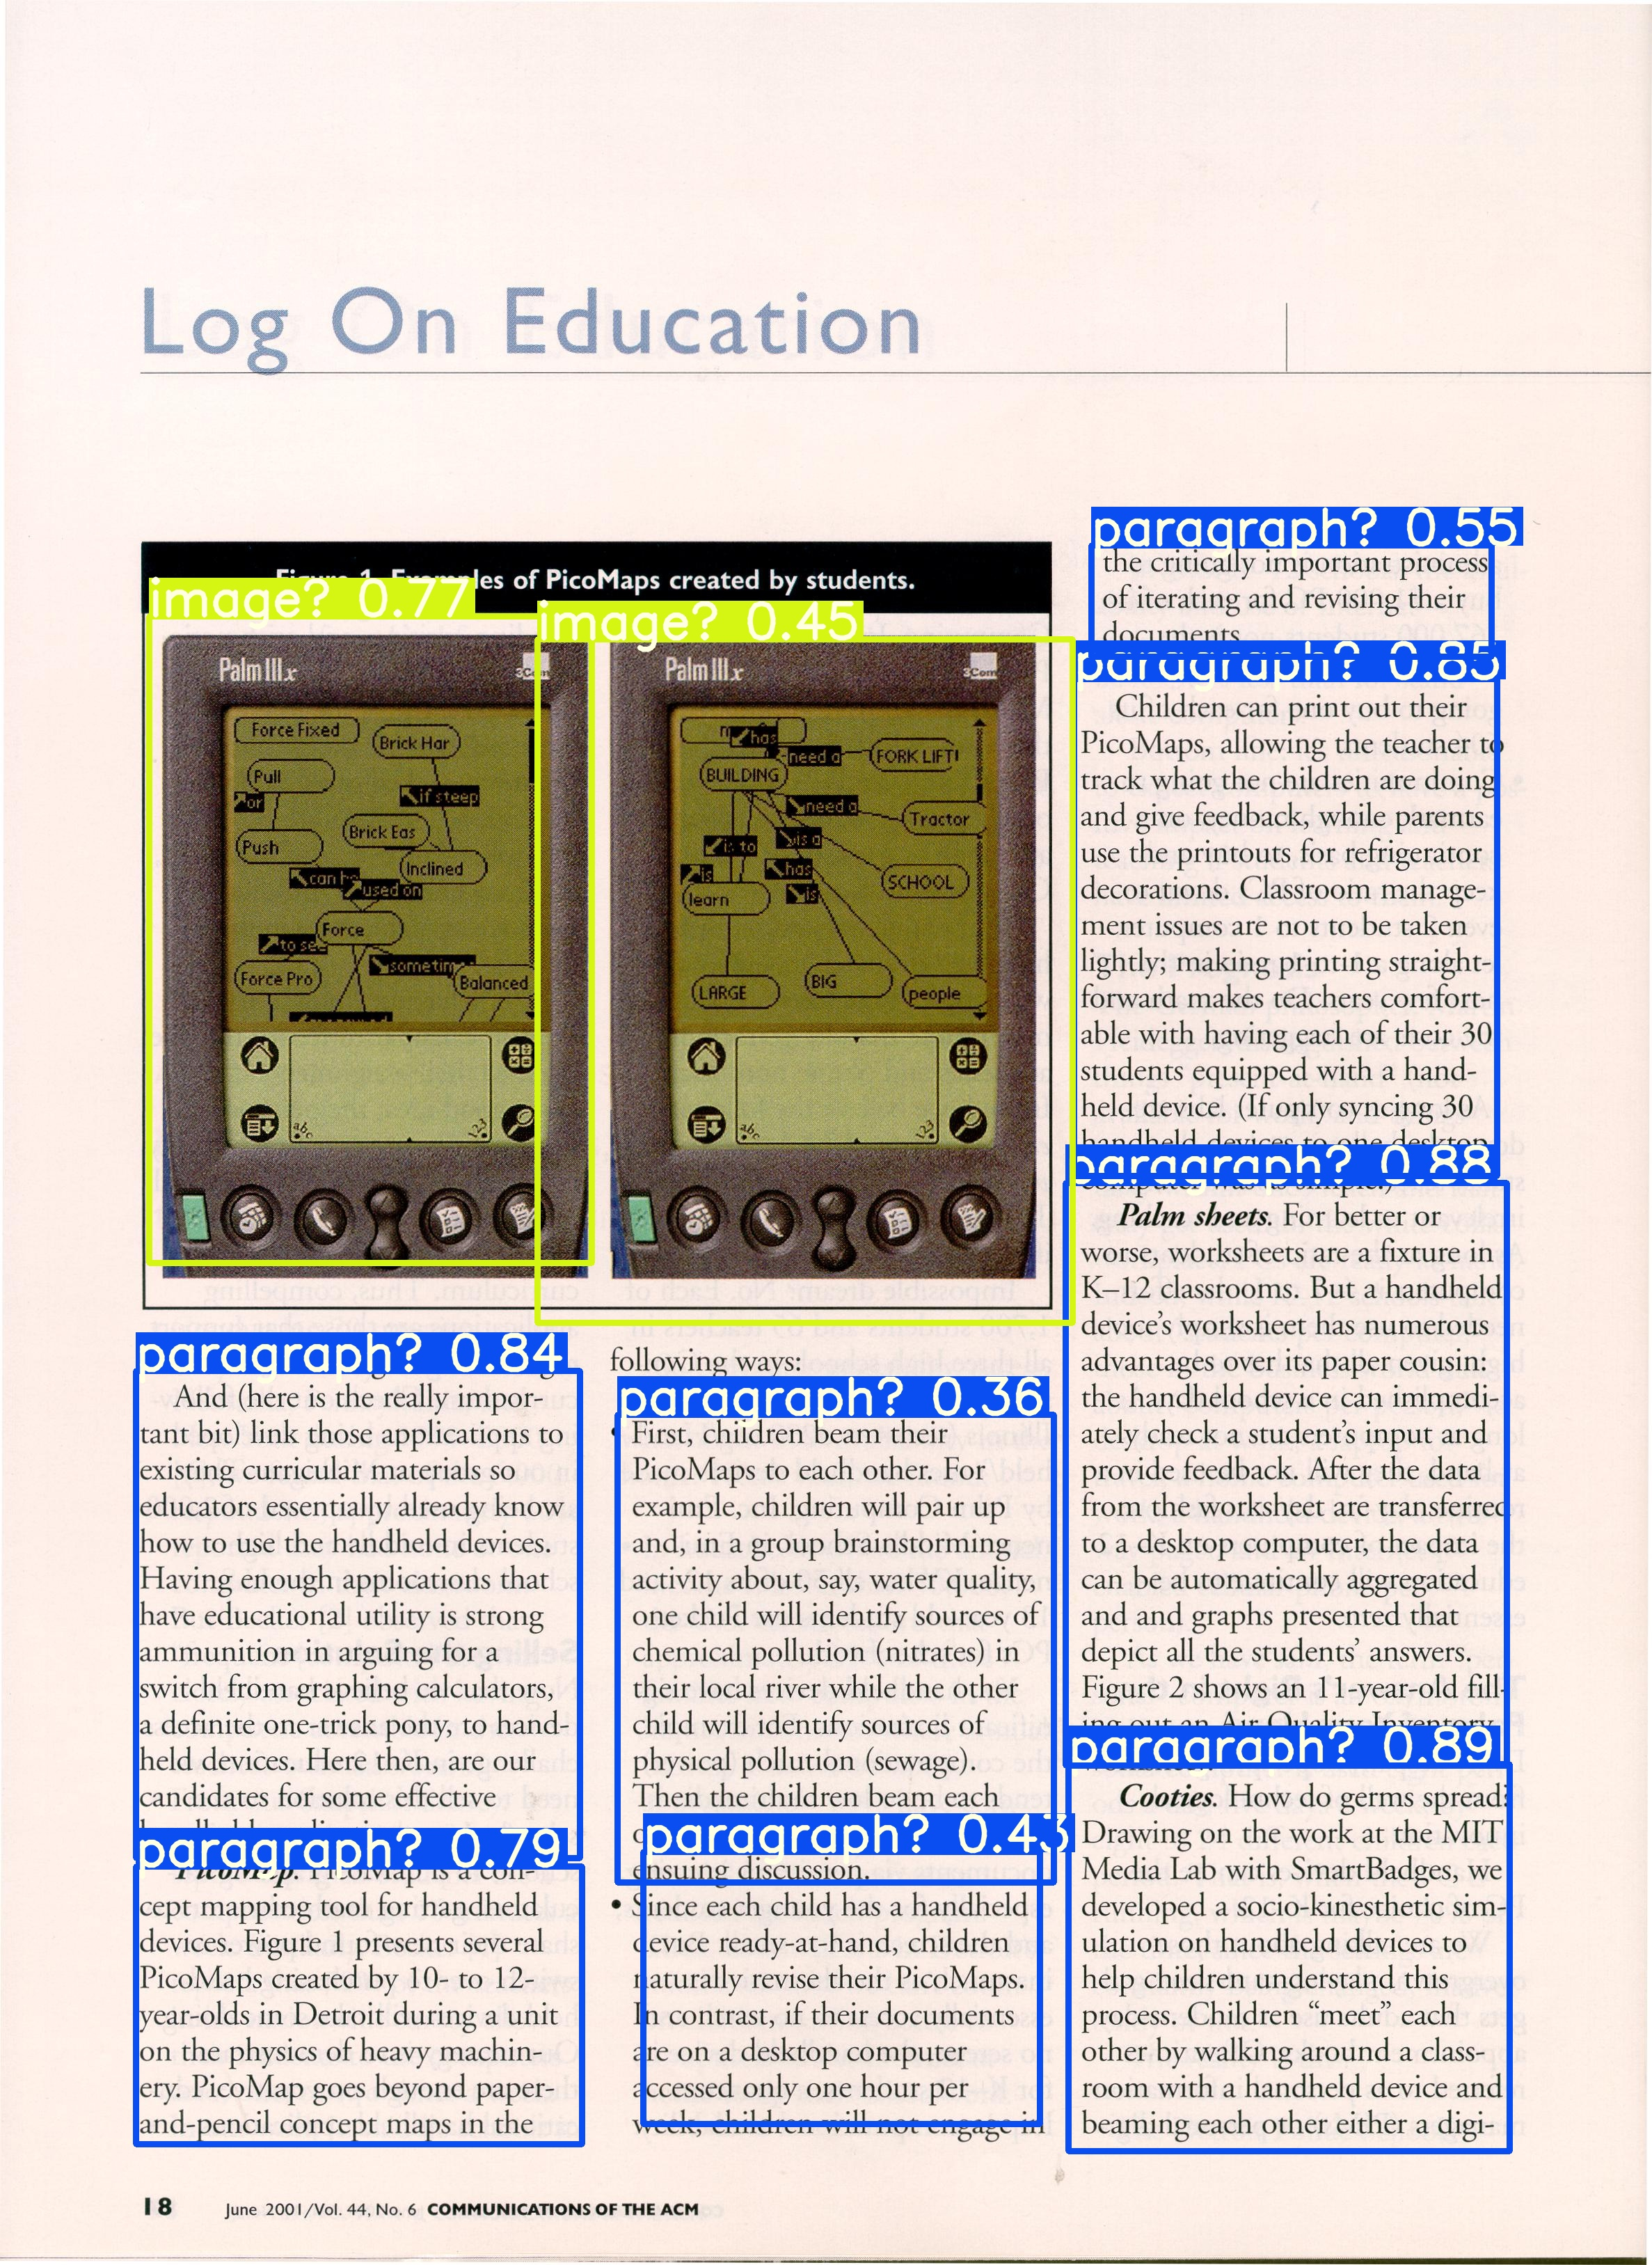

In [35]:
img_path = "PRImA_Layout_Analysis_Dataset/Test_Images/test2.jpg";
gtf.Predict(img_path, conf_thres=0.3, iou_thres=0.5);
Image(filename='output/test2.jpg')

image 1/1 tmp/test3.jpg: 416x288 2 heading
s, 2 image
s, 6 paragraph
s, Done. (0.049s)
Results saved to /home/swapnil/output
Done. (0.398s)


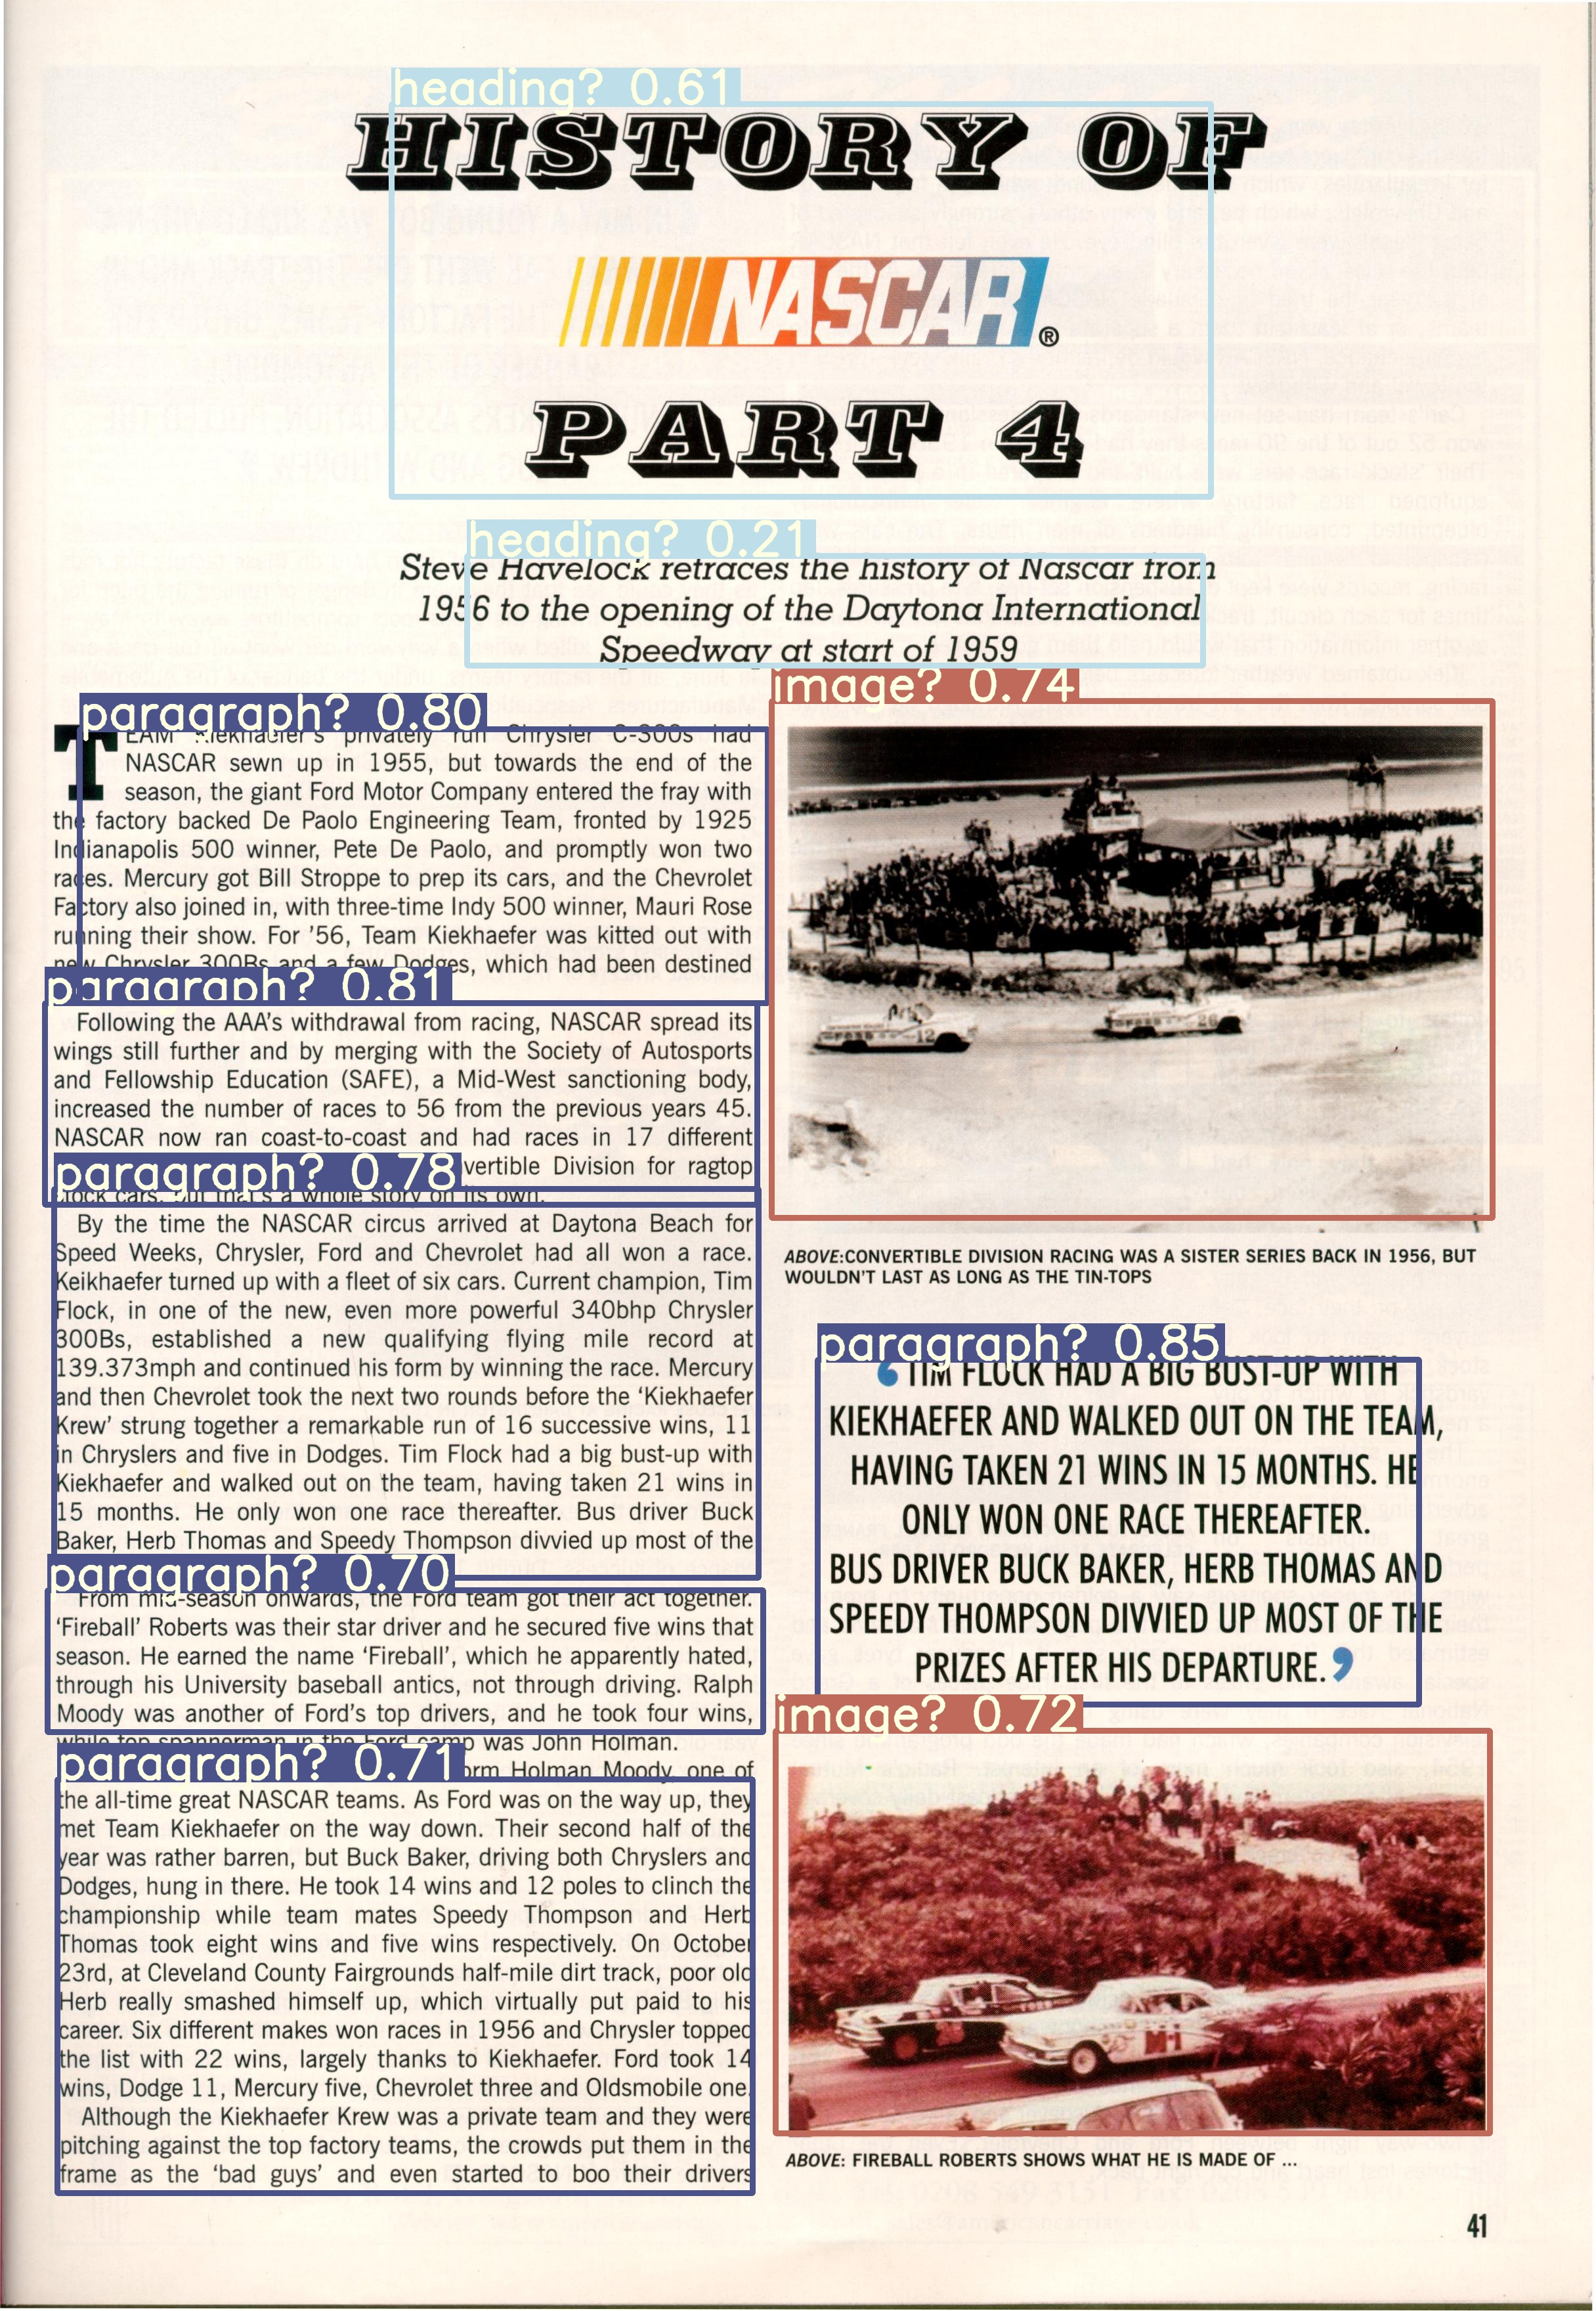

In [32]:
img_path = "PRImA_Layout_Analysis_Dataset/Test_Images/test3.jpg";
gtf.Predict(img_path, conf_thres=0.2, iou_thres=0.5);
Image(filename='output/test3.jpg')

The model is predicting most of the labels correctly with high confidence (though it is missing some of them) and the bounding boxes are also fine. Both of them can be greatly improved after training for more epochs.